In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('file:///C://Users/Lenovo/Desktop/Data/creditcard.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [4]:
df.shape

(1319, 12)

In [5]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [7]:
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
reports,1319.0,0.456406,1.345267,0.000000,0.000000,0.000000,0.000000,14.00000
age,1319.0,33.213103,10.142783,0.166667,25.416670,31.250000,39.416670,83.50000
income,1319.0,3.365376,1.693902,0.210000,2.243750,2.900000,4.000000,13.50000
share,1319.0,0.068732,0.094656,0.000109,0.002316,0.038827,0.093617,0.90632
expenditure,1319.0,185.057071,272.218917,0.000000,4.583333,101.298300,249.035800,3099.50500
dependents,1319.0,0.993935,1.247745,0.000000,0.000000,1.000000,2.000000,6.00000
months,1319.0,55.267627,66.271746,0.000000,12.000000,30.000000,72.000000,540.00000
majorcards,1319.0,0.817286,0.386579,0.000000,1.000000,1.000000,1.000000,1.00000
active,1319.0,6.996967,6.305812,0.000000,2.000000,6.000000,11.000000,46.00000


In [10]:
df['card']= df['card'].astype('category')
df['card']= df['card'].cat.codes

df['owner']= df['owner'].astype('category')
df['owner']= df['owner'].cat.codes

df['selfemp']= df['selfemp'].astype('category')
df['selfemp']= df['selfemp'].cat.codes

In [11]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [13]:
import seaborn as sns

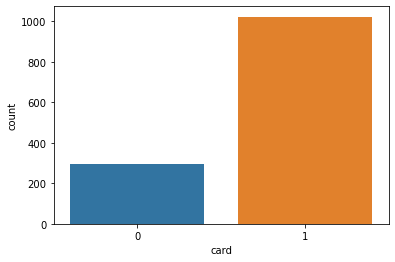

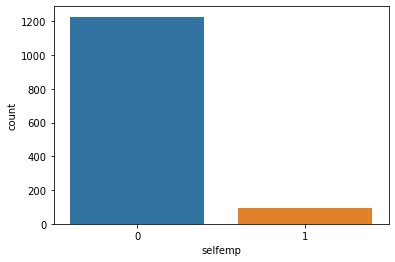

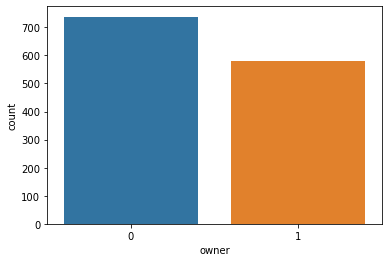

In [15]:
sns.countplot(x='card', data= df)
plt.show()
sns.countplot(x= 'selfemp', data= df)
plt.show()
sns.countplot(x='owner', data=df)
plt.show()

In [32]:
df['card'].value_counts()

1    1023
0     296
Name: card, dtype: int64

In [38]:
no_count= len(df[df['card']==0])
yes_count= len(df[df['card']==1])

In [39]:
(yes_count /(yes_count + no_count))*100

77.5587566338135

Text(0, 0.5, 'frequency')

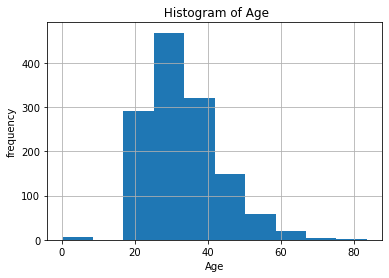

In [40]:
df.age.hist()
plt.title(' Histogram of Age')
plt.xlabel('Age')
plt.ylabel('frequency')

Text(0.5, 0, 'Dependents')

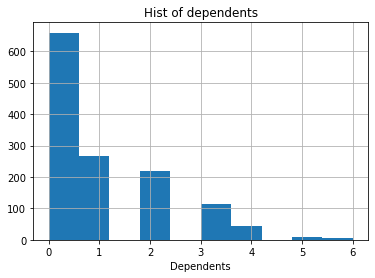

In [41]:
df.dependents.hist()
plt.title('Hist of dependents')
plt.xlabel('Dependents')

Text(0, 0.5, 'frequency')

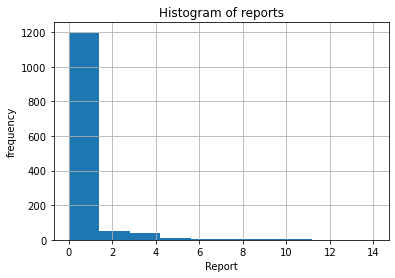

In [42]:
df.reports.hist()
plt.title('Histogram of reports')
plt.xlabel('Report')
plt.ylabel('frequency')

In [43]:
df['selfemp'].value_counts()

0    1228
1      91
Name: selfemp, dtype: int64

# Logistic Regression Model

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
x = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]]
y = df.iloc[:, [0]]

In [47]:
classifier = LogisticRegression()

classifier.fit(x, y)
classifier.coef_

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-1.65637350e+00,  2.03296465e-02, -1.04268518e-01,
        -1.18777269e-03,  1.66278290e+00,  4.00371827e-01,
         3.65360397e-01, -6.72614289e-01, -2.62219651e-03,
         4.41961409e-01,  7.63239074e-02]])

In [48]:
classifier.predict_proba(x)

array([[0.00000000e+00, 1.00000000e+00],
       [1.27189517e-06, 9.99998728e-01],
       [7.75718600e-10, 9.99999999e-01],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [50]:
y_pred = classifier.predict(x)
df['y_pred'] = y_pred
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,y_pred
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1


In [52]:
y_prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
y_prob.head()

,0,1
0,0.000000e+00,1.000000
1,1.271895e-06,0.999999
2,7.757186e-10,1.000000
3,0.000000e+00,1.000000
4,0.000000e+00,1.000000


In [54]:
df1 = pd.concat([df, y_prob], axis = 1).sort_index()
df1.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,y_pred,0,1
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,1,0.000000e+00,1.000000
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1,1.271895e-06,0.999999
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,1,7.757186e-10,1.000000
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1,0.000000e+00,1.000000
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,1,0.000000e+00,1.000000


In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix= confusion_matrix(y, y_pred)

In [57]:
confusion_matrix

array([[ 295,    1],
       [  23, 1000]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       296
           1       1.00      0.98      0.99      1023

    accuracy                           0.98      1319
   macro avg       0.96      0.99      0.97      1319
weighted avg       0.98      0.98      0.98      1319



In [61]:
from sklearn import metrics

In [62]:
print("Accuracy: ", metrics.accuracy_score(y, y_pred))

Accuracy:  0.9818043972706596


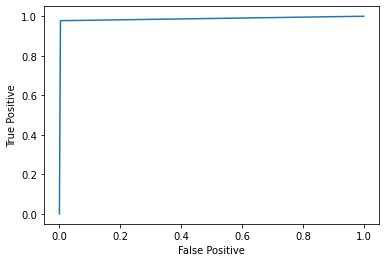

0.9870693640854931

In [63]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(df.card, y_pred)

# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
plt.show()
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
roc_auc
